In [15]:
## imports and uploads

In [16]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from tqdm.auto import tqdm
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.simplefilter('ignore')
import os
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from matplotlib.gridspec import GridSpec
from collections import defaultdict
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [17]:
# upload data
cpath = os.getcwd() #assumes mean_df_females is in the same path as the notebook
mean_df = pd.read_csv(cpath+'/mean_df_indv.csv')
df=mean_df.copy()

# ----------------------------------------------------------------------- 
# ANALYSIS
# -----------------------------------------------------------------------

In [18]:
# plot/colors definitions
data_loc=cpath+'/figs/'
try:
    os.mkdir(data_loc)
except FileExistsError:
    # directory already exists
    pass

plt.style.use("seaborn-paper")

In [19]:
def _plot_cm(y_true, y_pred, ax, ax_labels, title):
    cm = confusion_matrix(y_true, y_pred)
    cm = cm / cm.sum(axis=1, keepdims=True)
    im = ax.imshow(cm, cmap='copper', vmin=0, vmax=1)
    plt.xticks(range(len(ax_labels)), ax_labels)
    plt.yticks(range(len(ax_labels)), ax_labels)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Real')
    ax.set_title(title)
    return im

def plot_cm(y_true, y_pred, y_shuffle_true, y_shuffle_pred,name):
    '''
    plot confusion matrix

    Args:
        y_true ([np.array]): array for true label
        y_pred ([np.array]): array for predicted label
        y_shuffle_true ([np.array]): array for shffuled label
        y_shuffle_pred ([np.array]): array for shuffled predicted label
    '''
    fig = plt.figure(figsize=(23, 10), facecolor='white')
    gs = GridSpec(ncols=3, nrows=1, wspace=0.1, figure = fig, width_ratios=[10,10,0.3])
    fig_ax = fig.add_subplot(gs[0,0])
    labels = np.unique(y_true)
    _plot_cm(y_true, y_pred, fig_ax, labels, f'Real Accuracy {accuracy_score(y_true, y_pred):0.2f}')

    fig_ax = fig.add_subplot(gs[0,1])
    im = _plot_cm(y_shuffle_true, y_shuffle_pred, fig_ax, labels, f'Shuffle Accuracy {accuracy_score(y_shuffle_true, y_shuffle_pred):0.2f}')
    fig_ax.set_ylabel('')
    fig_ax.set_yticklabels([])

    # plot colorbar
    cb = fig.add_subplot(gs[0,2])
    fig.colorbar(mappable=im, cax=cb, label='Fraction of labels', )
    fig.tight_layout()
    plt.show()
    fig.savefig(data_loc +name+'.pdf', bbox_inches='tight')

## individual decoder males

In [20]:
# define decoder parameters
it=100 #number of restarts
leave = 'rep'
predict='mouse'
minum=5

In [21]:
# choose mice that have at least 10 repetitions 
minr= 5
rep_counts = df.groupby('mouse')['rep'].nunique()
keep_mice = list(rep_counts[rep_counts >= minr].index) # keep mice that have at least 10 sessions

#all sessions!
data = df[df['mouse'].isin(keep_mice)].groupby(by = ['mouse','rep','syllable']).mean()['usage'].reset_index()
data = pd.pivot_table(data, values='usage', index=['rep', 'mouse'], columns=['syllable']).reset_index().fillna(0)

In [22]:
data

syllable,rep,mouse,0,1,2,3,4,5,6,7,...,31,32,33,34,35,36,37,38,39,41
0,1,1,0.030586,0.017842,0.010195,0.033560,0.019116,0.016143,0.025489,0.018267,...,0.012744,0.009346,0.024214,0.009771,0.008496,0.016992,0.020391,0.011470,0.000425,0.005947
1,1,2,0.031223,0.032079,0.005560,0.010265,0.031651,0.035500,0.010265,0.012831,...,0.005988,0.016253,0.012404,0.024808,0.001283,0.008554,0.002994,0.008127,0.033362,0.010693
2,1,3,0.018527,0.014727,0.007126,0.019477,0.014252,0.020428,0.031829,0.016627,...,0.010451,0.006176,0.019952,0.013302,0.016152,0.028979,0.014727,0.010451,0.002375,0.009501
3,1,4,0.029036,0.036779,0.010840,0.015873,0.009679,0.032907,0.019744,0.011614,...,0.013550,0.022842,0.014324,0.015873,0.009292,0.010453,0.003097,0.006194,0.002710,0.018196
4,1,5,0.040039,0.014472,0.009165,0.023155,0.029908,0.020743,0.026049,0.014472,...,0.012542,0.009648,0.016401,0.020260,0.015919,0.026049,0.023155,0.018331,0.014472,0.011095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,7,32,0.037114,0.040033,0.012927,0.017932,0.023353,0.015013,0.033778,0.023353,...,0.029191,0.014595,0.002502,0.005838,0.014178,0.014595,0.008340,0.009591,0.004587,0.005004
248,7,33,0.035107,0.045455,0.061715,0.016260,0.021803,0.029194,0.038064,0.019586,...,0.014782,0.019956,0.009608,0.007021,0.012195,0.005543,0.007391,0.011456,0.011456,0.008130
249,7,34,0.035728,0.039223,0.015922,0.024854,0.032621,0.020583,0.015922,0.024466,...,0.008544,0.023301,0.014369,0.011650,0.003107,0.005825,0.017864,0.014369,0.029515,0.007767
250,7,35,0.042367,0.044193,0.038349,0.025201,0.027757,0.033236,0.025201,0.017531,...,0.026662,0.019357,0.008766,0.011687,0.021549,0.004748,0.003652,0.016070,0.006574,0.009861


In [23]:
#decoder
clf = RandomForestClassifier(n_estimators = 250,class_weight='balanced')
out = defaultdict(list)
for i in tqdm(range(it)):
    sm = data.copy()
    a,b= [],[]
    for leaveout in sm[leave].unique():
        train = sm[sm[leave] != leaveout]
        test = sm[sm[leave] == leaveout]

        X_test = test.drop(['rep','mouse'], axis=1).to_numpy()
        y_test = test[predict].to_numpy()

        #balance labels
        btrain = train.groupby(predict).apply(lambda x: x.sample(n=minum-1,replace=False)).reset_index(drop=True) # new balanced df
        X_train = btrain.drop(['rep','mouse'], axis=1).to_numpy()
        y_train = btrain[predict].to_numpy()

        clf.fit(X_train, y_train)
        y_hat = clf.predict(X_test)
        a.append(y_test)
        b.append(y_hat)
    out['y_true'].extend(a)
    out['y_pred'].extend(b)
    out['acc'].append(accuracy_score(np.concatenate(a),np.concatenate(b)))

#shuffle
for i in tqdm(range(it)):
    sm = data.copy()
    sm['mouse'] = sm.groupby('rep')['mouse'].transform(np.random.permutation)
    a,b= [],[]
    for leaveout in sm[leave].unique():
        train = sm[sm[leave] != leaveout]
        test = sm[sm[leave] == leaveout]

        X_test = test.drop(['rep','mouse'], axis=1).to_numpy()
        y_test = test[predict].to_numpy()

        #balance labels
        btrain = train.groupby(predict).apply(lambda x: x.sample(n=minum-1,replace=False)).reset_index(drop=True) # new balanced df
        X_train = btrain.drop(['rep','mouse'], axis=1).to_numpy()
        y_train = btrain[predict].to_numpy()

        clf.fit(X_train, y_train)
        y_hat = clf.predict(X_test)
        a.append(y_test)
        b.append(y_hat)
    out['sy_true'].extend(a)
    out['sy_pred'].extend(b)
    out['sacc'].append(accuracy_score(np.concatenate(a),np.concatenate(b)))

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [24]:
# save decoder results
decoder ='mouse_decoder_indv'
with open(data_loc+decoder+'.dat', 'wb') as f:
    pickle.dump((out), f)

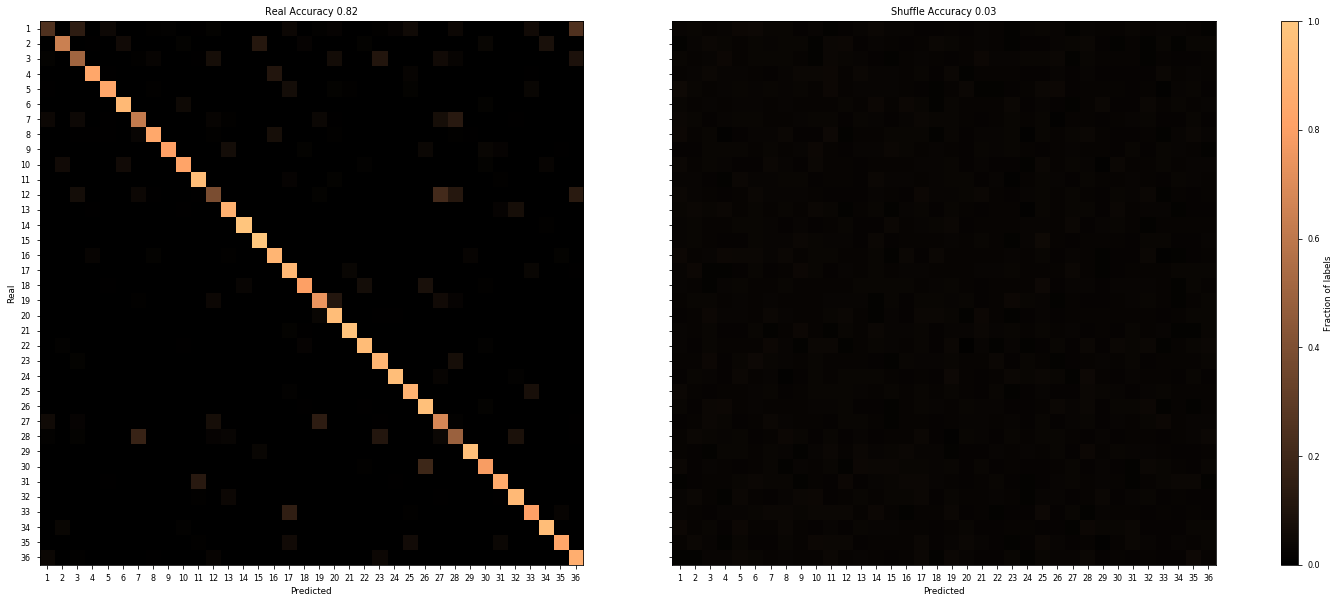

In [25]:
# plot confusion matrix
plot_cm(np.concatenate(out['y_true']),np.concatenate(out['y_pred']),
        np.concatenate(out['sy_true']),np.concatenate(out['sy_pred']),decoder+'_confusion')

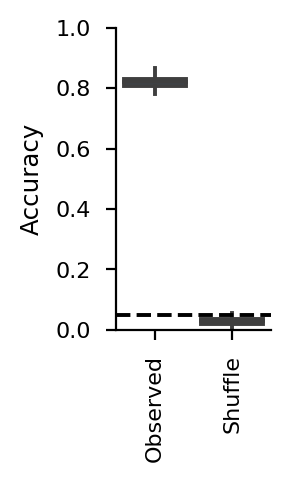

In [26]:
# plot accuracy
shuff_v=pd.DataFrame()
shuff_v['accuracy'] = out['acc']
shuff_v['shuff_accuracy'] = out['sacc']
fig = plt.figure(figsize=(1, 2))
fig.dpi = 200
ax = sns.boxplot(data=shuff_v, showfliers=False, showcaps=False, order=['accuracy', 'shuff_accuracy'])
plt.xticks(ticks=[0, 1], labels=['Observed', 'Shuffle'], rotation=90)
ax.set(ylabel='Accuracy')
plt.ylim([0,1])
plt.axhline(y=shuff_v['shuff_accuracy'].quantile(.95), xmin=0, xmax=1, ls='--', c='k') #plot threshold for significance 
sns.despine()
fig.savefig(data_loc +decoder+'accuracy.pdf', bbox_inches='tight')

In [27]:
# is it significant?
loc = int(np.floor(len(shuff_v['shuff_accuracy'])*0.95))
a=np.argsort(shuff_v['shuff_accuracy'])
print('95th precentile of suffle is: ',shuff_v['shuff_accuracy'].quantile(.95)) # [a].to_numpy()[loc])
print('mean of decoding distribution is: ',np.mean(np.array(shuff_v['accuracy'])))
print ('mean shuffle accuracy is: ',np.mean(shuff_v['shuff_accuracy']))

95th precentile of suffle is:  0.047619047619047616
mean of decoding distribution is:  0.8192063492063493
mean shuffle accuracy is:  0.027380952380952374
